In [5]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display

# EDA

In [6]:
# Extrac one audio file to see the data
data, sampling_rate = librosa.load('data/Angry_Female/anger_xn_10.wav')

## Waveform of Audio

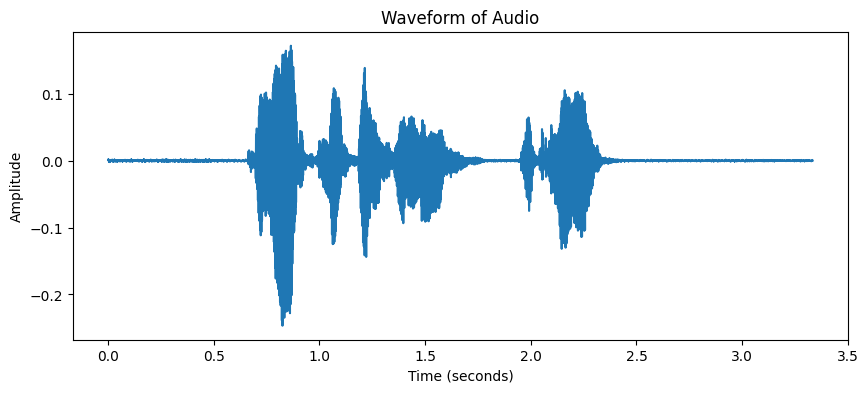

In [7]:
# Get the waveform of the audio file

# Generate time axis values
time = np.linspace(0, len(data)/sampling_rate, num=len(data))
# Plot
plt.figure(figsize=(10, 4))  # Set the figure size
plt.plot(time, data)
plt.title('Waveform of Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()


## Magnitude Spectrogram

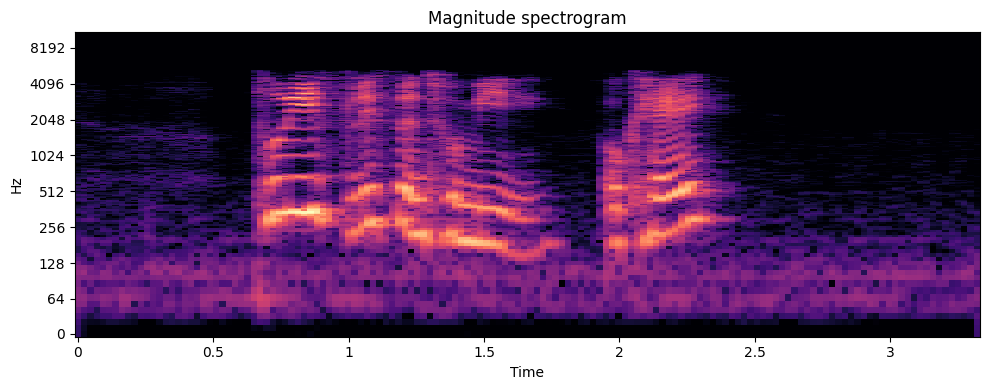

In [8]:
# Get the magnitude spectrogram
D = np.abs(librosa.stft(data))
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Magnitude spectrogram')
plt.tight_layout()
plt.show()


## MFCC

(40, 144)


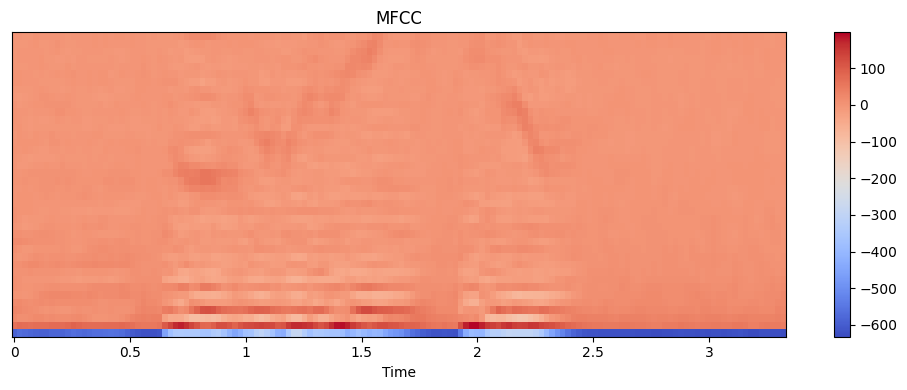

144
[-10.642646  -11.2650795 -12.329593  -12.382738  -11.0662775 -11.030466
 -11.332436  -10.003417  -10.253578  -11.111002  -11.060372  -11.45744
 -11.727282  -11.751005  -11.196893  -11.265781  -11.566046  -10.740567
 -11.136945  -11.830854  -10.535223  -10.484119  -10.873392  -10.612274
 -10.431394  -11.70699   -11.661524  -10.798926   -8.383973   -6.5921106
  -6.6471953  -8.361116   -8.822774   -8.460015   -8.293111   -8.841513
  -9.606401   -9.090681   -9.534672  -10.6888    -10.430996   -9.707819
  -8.859522   -8.506189   -7.764447   -7.8102927  -8.611733   -8.311836
  -9.202284  -10.877565  -11.076202  -10.199375  -10.396223  -10.424267
  -8.759944   -8.489058   -8.747853   -8.609545   -8.538904   -8.207651
  -8.649431   -9.679296   -9.506278   -9.723148   -8.977335   -8.647636
  -8.243391   -9.671524  -10.777577  -11.1888895 -11.553155  -11.633398
 -12.572466  -12.963504  -11.115359  -10.469996  -10.749843  -10.995435
 -12.19845   -12.143351  -11.680722  -11.48584   -11.023776 

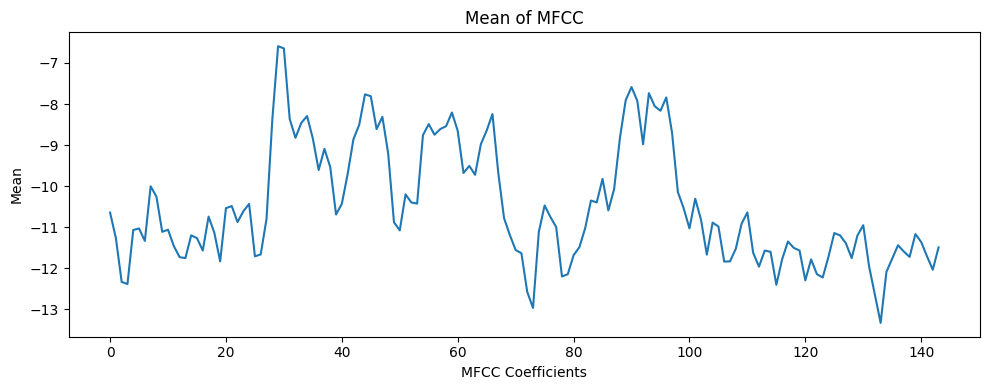

In [9]:
# Get MFCC
mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40)
print(mfccs.shape)

# Displaying  the MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

# get the mean of the MFCC
mfccs_mean = np.mean(mfccs, axis=0)
print(len(mfccs_mean))
print(mfccs_mean)


# Displaying the mean of the MFCC
plt.figure(figsize=(10, 4))
plt.plot(mfccs_mean)
plt.title('Mean of MFCC')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Mean')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [10]:
# Convert audio files: Ensure all audio files are in a uniform format (e.g., WAV) and sample rate.
# Noise Reduction: Apply noise reduction techniques to clean up the audio, if necessary.
# Segmentation: Sometimes, you might need to segment longer audio files into shorter clips that are more manageable and consistent in length.

# Feature Extraction

In [11]:
# Extract relevant features: Common features for emotion recognition include Mel-Frequency Cepstral Coefficients (MFCCs), Chroma features, Mel-spectrogram, spectral contrast, and tonnetz. These features can capture the nuances in speech that correlate with different emotions.
# Normalization: Normalize features to ensure that the scale of the features does not negatively impact the performance of your ML model.


# Extracting features from audio files
def extract_features(file_path):
    # Load the audio file
    data, sampling_rate = librosa.load(file_path)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40)
    mfccs_mean = np.mean(mfccs, axis=0)

    # Extract other features (e.g., chroma, mel-spectrogram, spectral contrast, tonnetz)
    # chroma = librosa.feature.chroma_stft(y=data, sr=sampling_rate)

    return mfccs_mean

# Create a dataframe to store the features
df = pd.DataFrame(columns=['File_name','Label','MFCC'])
# Loop through each audio file and extract features
# four emotions: anger, fear, joy, and neutral which are four folders
emotions = ['anger', 'fear', 'joy', 'neutral']
# loop through each folder and extract the features


# Data Splitting

# Modelling

Baseline Model, CNN, RNN, LSTM

# Evaluation